In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
df.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [42]:
df.duplicated().mean()

0.0

In [43]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Pasamos la columna de edad a tipo INT

In [44]:
#Nos fijamos los valores unicos
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [45]:
#Llenamos los NaN con interpolacion linear
df["Age"].interpolate(method="linear", inplace=True)
#Pasamos la columna a entero
df["Age"] = df["Age"].astype(int)

In [46]:
#Chequeamos el resultado
df["Age"].unique()

array([22, 38, 26, 35, 44, 54,  2, 27, 14,  4, 58, 20, 39, 55, 16, 31, 33,
       34, 15, 28,  8, 19, 40, 48, 57, 66, 42, 21, 18,  3,  7, 49, 29, 65,
       43,  5, 11, 45, 12, 17, 32, 25,  0, 30, 23, 24, 46, 59, 71, 37, 47,
       70,  9, 36, 51,  1, 61, 56, 50, 41, 62, 52, 63,  6, 60, 10, 64, 13,
       53, 80, 74])

Categorizar la variable del genero

In [47]:
#Chequeamos los valores de la columna por si hay algun valor incorrecto
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [48]:
#Reemplazamos male por 0
df["Sex"].replace("male", 0, inplace=True)
#Reemplazamos female por 1
df["Sex"].replace("female", 1, inplace=True)

In [49]:
#Chequeamos los cambios hechos
df["Sex"].unique()

array([0, 1], dtype=int64)

Eliminamos la columna de cabin ya que tiene un 77% de datos nulos y no nos sirve

In [50]:
df.drop("Cabin", axis=1, inplace=True)

Vamos a graficar cuantos hombres y mujeres sobrevivieron y cuántos no

In [60]:
#Agrupamos por sexo y por si sobrevivió y contamos los registros
count_genero = df.groupby(["Sex", "Survived"])["Survived"].count().reset_index(name="Cantidad")
count_genero

,Sex,Survived,Cantidad
0,0,0,468
1,0,1,109
2,1,0,81
3,1,1,233


In [63]:
#Reemplazamos 0 por male y 1 por female
count_genero["Sex"].replace(0, "Male", inplace=True)
count_genero["Sex"].replace(1, "Female", inplace=True)
#Reemplazamos 0 por not survived y 1 por survived
count_genero["Survived"].replace(0, "Not Survived", inplace=True)
count_genero["Survived"].replace(1, "Survived", inplace=True)
count_genero

,Sex,Survived,Cantidad
0,Male,Not Survived,468
1,Male,Survived,109
2,Female,Not Survived,81
3,Female,Survived,233


In [66]:
#Unimos las columnas de sex y survived para poder graficar
count_genero["Sex_Survived"] = count_genero["Sex"].astype(str) + " " + count_genero["Survived"].astype(str)
count_genero["Sex_Survived"]

0      Male Not Survived
1          Male Survived
2    Female Not Survived
3        Female Survived
Name: Sex_Survived, dtype: object

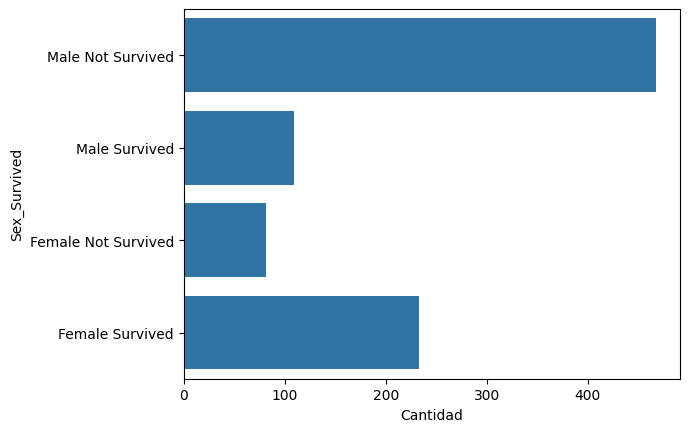

In [69]:
#Graficamos
sns.barplot(data = count_genero, y="Sex_Survived", x = "Cantidad")
plt.show()

Podemos ver que en porcentaje sobrevivieron mas mujeres que hombres

Guardamos el archivo con los cambios hechos

In [73]:
df.to_csv("train_limpio.csv", index=False)

Archivo de test

In [75]:
df_test = pd.read_csv("test.csv")
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [76]:
df_test.isna().mean()

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [77]:
df_test.duplicated().mean()

0.0

In [79]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

Eliminamos la columna cabin ya que no nos sirve debido a tantos nulos

In [78]:
df_test.drop("Cabin", axis= 1, inplace=True)

Cambiamos la columna de age a int

In [81]:
df_test["Age"].unique()

array([34.5 , 47.  , 62.  , 27.  , 22.  , 14.  , 30.  , 26.  , 18.  ,
       21.  ,   nan, 46.  , 23.  , 63.  , 24.  , 35.  , 45.  , 55.  ,
        9.  , 48.  , 50.  , 22.5 , 41.  , 33.  , 18.5 , 25.  , 39.  ,
       60.  , 36.  , 20.  , 28.  , 10.  , 17.  , 32.  , 13.  , 31.  ,
       29.  , 28.5 , 32.5 ,  6.  , 67.  , 49.  ,  2.  , 76.  , 43.  ,
       16.  ,  1.  , 12.  , 42.  , 53.  , 26.5 , 40.  , 61.  , 60.5 ,
        7.  , 15.  , 54.  , 64.  , 37.  , 34.  , 11.5 ,  8.  ,  0.33,
       38.  , 57.  , 40.5 ,  0.92, 19.  , 36.5 ,  0.75,  0.83, 58.  ,
        0.17, 59.  , 14.5 , 44.  ,  5.  , 51.  ,  3.  , 38.5 ])

In [82]:
df_test["Age"].interpolate(method="linear", inplace=True)
df_test["Age"] = df_test["Age"].astype(int)

In [83]:
df_test["Age"].unique()

array([34, 47, 62, 27, 22, 14, 30, 26, 18, 21, 33, 46, 23, 63, 24, 35, 45,
       55,  9, 15, 48, 50, 41, 31, 19, 25, 32, 39, 40, 52, 60, 36, 20, 28,
       10, 17, 13, 29, 43,  6, 67, 49, 38,  2, 76, 16,  1, 12, 42, 53, 61,
        7, 54, 64, 37, 11,  8,  0, 57,  4, 44, 58, 59,  5, 51,  3])

Cambiamos la columna de sexo

In [84]:
df_test["Sex"].unique()

array(['male', 'female'], dtype=object)

In [86]:
df_test.replace("male", 0, inplace=True)
df_test.replace("female", 1, inplace=True)
df_test["Sex"].unique()

array([0, 1], dtype=int64)

Llenamos los valores nulos en la columna fare

In [88]:
df_test["Fare"].interpolate(method="cubic", inplace=True)
df_test["Fare"].isna().sum()

0

Guardamos a csv el test limpio

In [89]:
df_test.to_csv("test_limpio.csv", index=False)